In [215]:
from src.yahoo_finance import *
from src.edhec_risk_kit import *
import matplotlib.pyplot as plt
%matplotlib widget

# Modern Portfolio Theory

In [216]:
tickers = 'GOOG AAPL MSFT TSLA NVDA AMD CVX V MCD'
t = get_df(tickers, start=10)
t = monthly_returns(t)

[*********************100%***********************]  9 of 9 completed


[Text(0, 0.5, 'GOOG'),
 Text(0, 1.5, 'AAPL'),
 Text(0, 2.5, 'MSFT'),
 Text(0, 3.5, 'TSLA'),
 Text(0, 4.5, 'NVDA'),
 Text(0, 5.5, 'AMD'),
 Text(0, 6.5, 'CVX'),
 Text(0, 7.5, 'V'),
 Text(0, 8.5, 'MCD')]

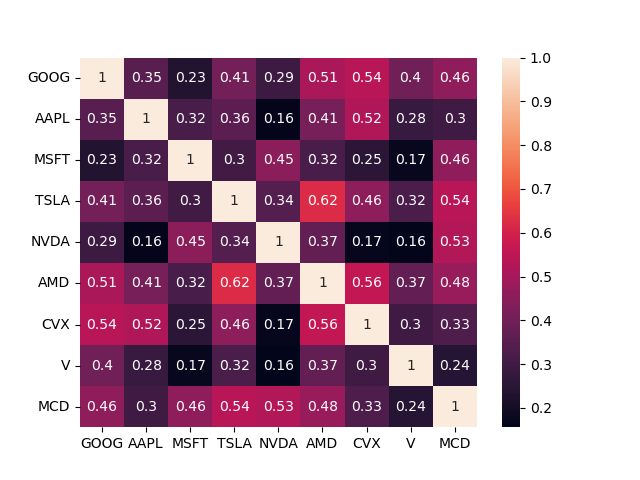

In [217]:
ax = sns.heatmap(t.corr(), annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

In [218]:
terminal_wealth(t)


GOOG     8.067303
AAPL    26.883331
MSFT     2.480704
TSLA     5.097494
NVDA     3.989681
AMD     10.839381
CVX     53.711354
V       54.539419
MCD      5.824132
dtype: float64

## Efficient Frontier

/home/surface/miniconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


,GOOG,AAPL,MSFT,TSLA,NVDA,AMD,CVX,V,MCD,Volatility,Return,Sharpe Ratio
Maximum Sharpe Ratio,2.245744e-16,0.000000e+00,1.270457e-16,8.011759e-17,0.342818,0.324592,1.865031e-01,4.212634e-02,0.103960,0.181701,0.270241,1.487286
Minimum Volatility,3.869462e-02,3.361027e-18,3.305184e-02,9.767893e-02,0.571126,0.160050,2.276825e-18,6.559423e-18,0.099398,0.146822,0.176385,1.201353
Equally Weighted,1.111111e-01,1.111111e-01,1.111111e-01,1.111111e-01,0.111111,0.111111,1.111111e-01,1.111111e-01,0.111111,0.221461,0.276134,1.246871


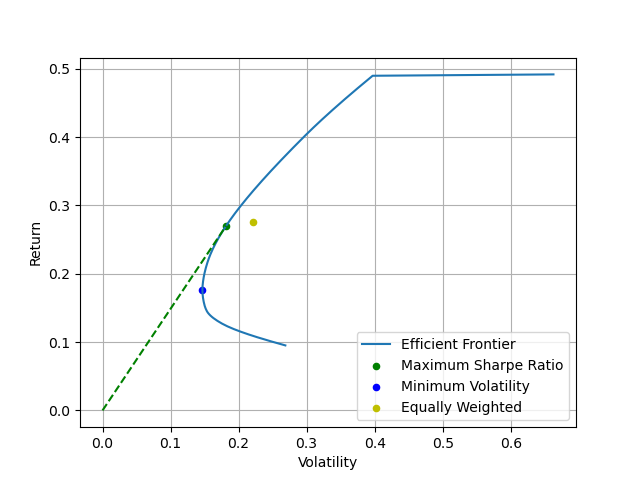

In [219]:
ef, df = efficient_frontier(200, t, t.cov(), 12, plot=True)
df